In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# Charger le dataset
df = pd.read_csv('/content/Data2.csv')


In [3]:
# 1. Compréhension de la structure du Dataset
# Dimensions du dataset
print("Dimensions du Dataset:", df.shape)

# Aperçu des données
print("\nAperçu des données:\n", df.head())

# Statistiques descriptives
print("\nStatistiques descriptives:\n", df.describe())

# Moyenne et médiane pour les colonnes numériques
mean_values = df.mean()
median_values = df.median()
print("\nMoyenne des colonnes numériques:\n", mean_values)
print("\nMédiane des colonnes numériques:\n", median_values)

# Vérification des types de données
print("\nTypes de données:\n", df.dtypes)

Dimensions du Dataset: (1025, 14)

Aperçu des données:
    Age  Gender  ChestPainType  RestingBloodPressure  CholesterolLevel  \
0   52       1              0                   125               212   
1   53       1              0                   140               203   
2   70       1              0                   145               174   
3   61       1              0                   148               203   
4   62       0              0                   138               294   

   FastingBloodSugar  RestingECG  MaxHeartRateAchieved  ExerciseInducedAngina  \
0                  0           1                   168                      0   
1                  1           0                   155                      1   
2                  0           1                   125                      1   
3                  0           1                   161                      0   
4                  1           1                   106                      0   

   STDepression  S

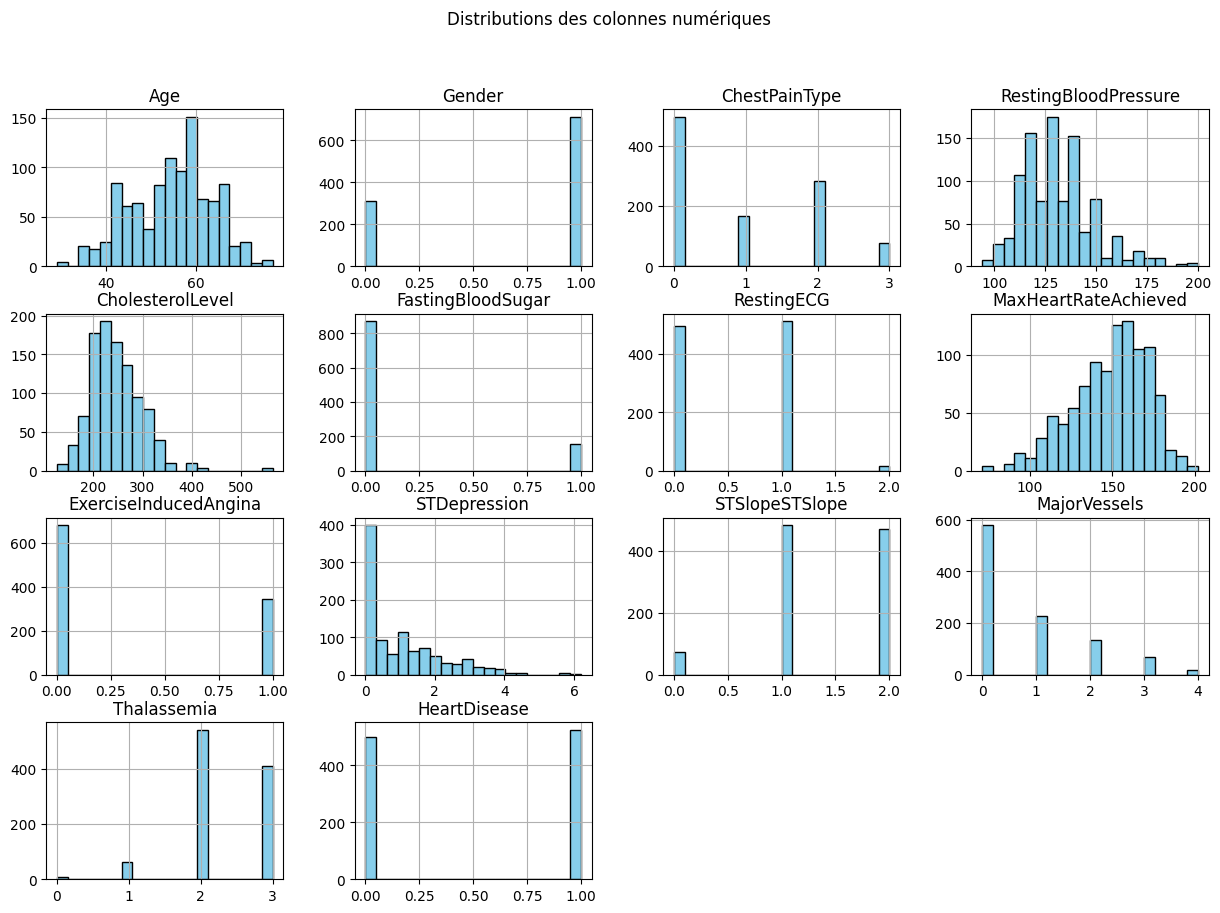

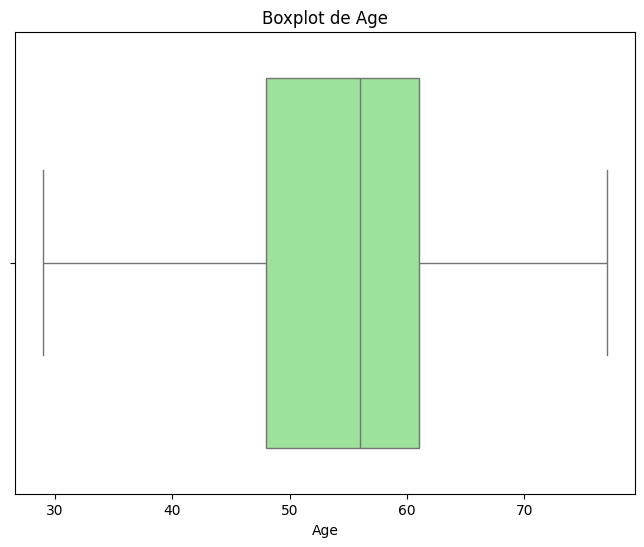

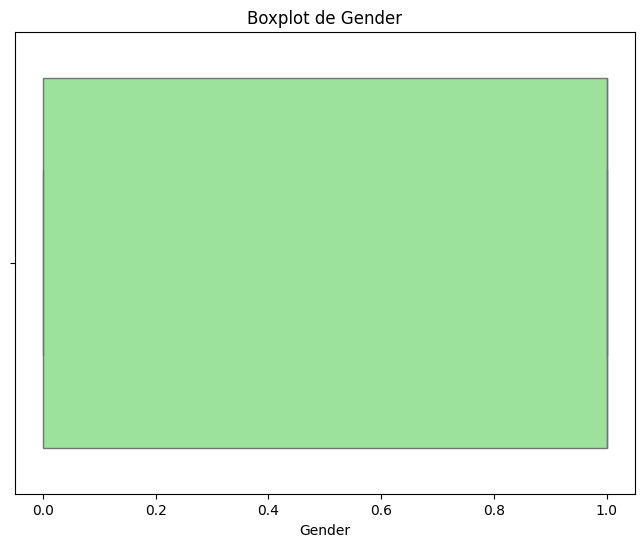

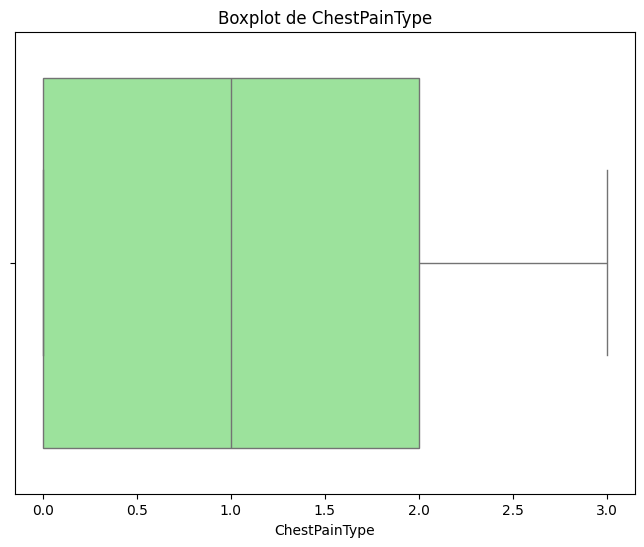

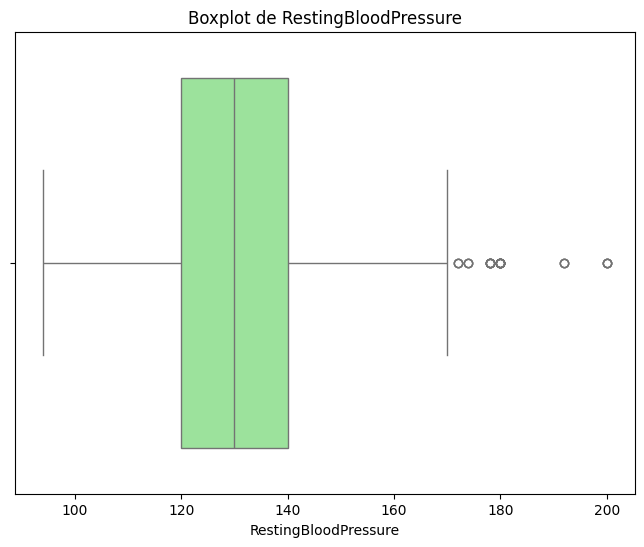

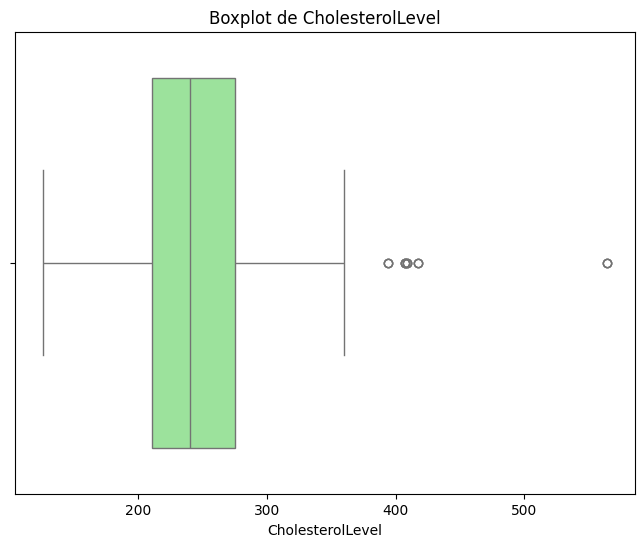

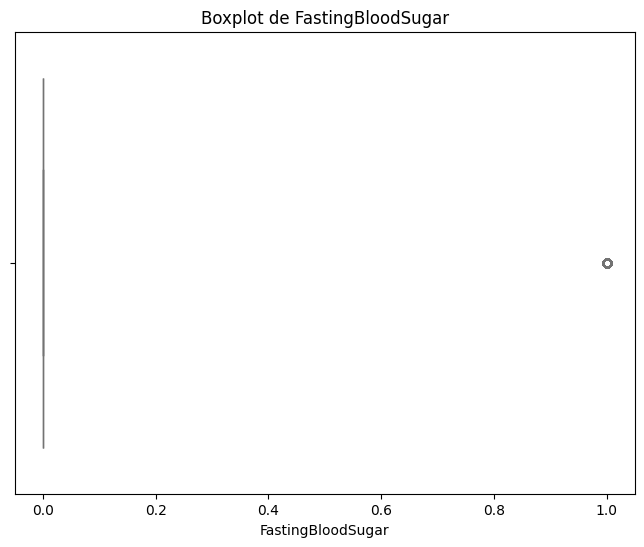

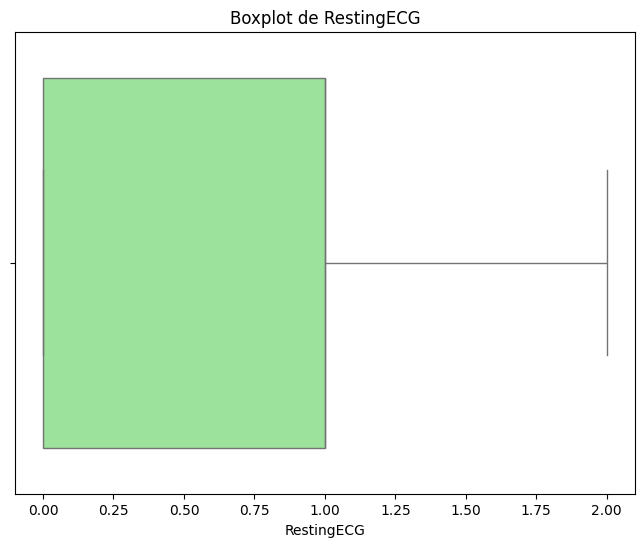

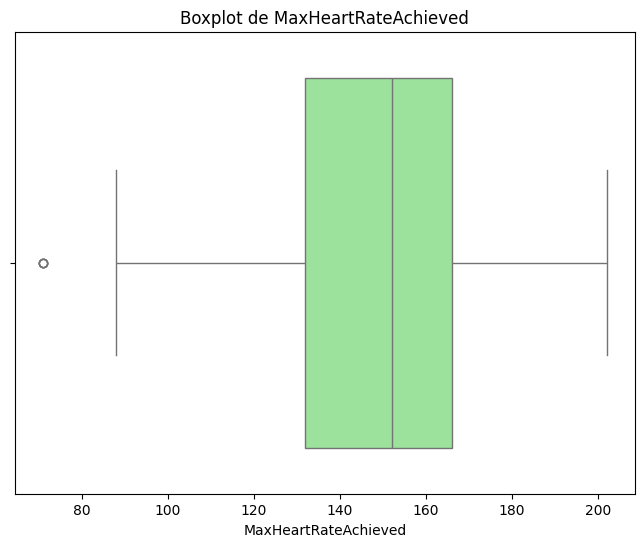

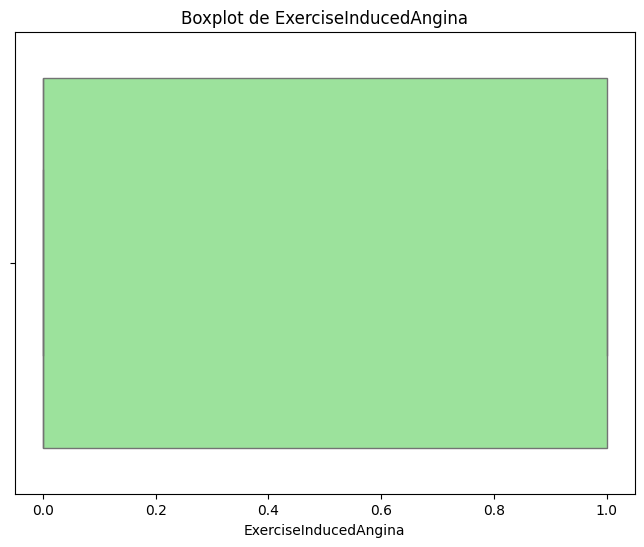

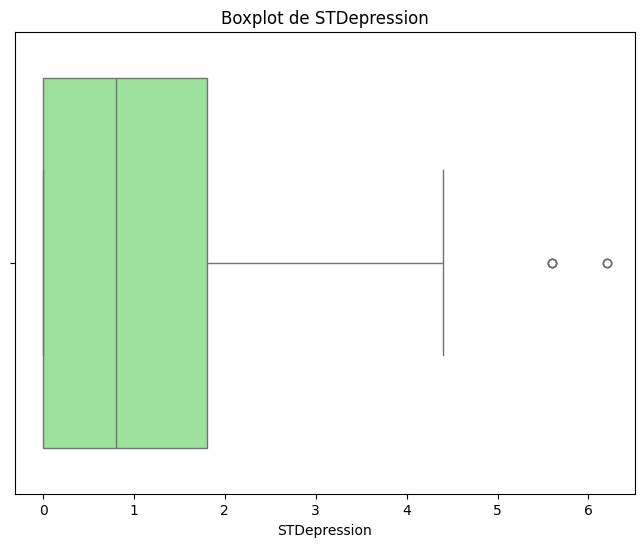

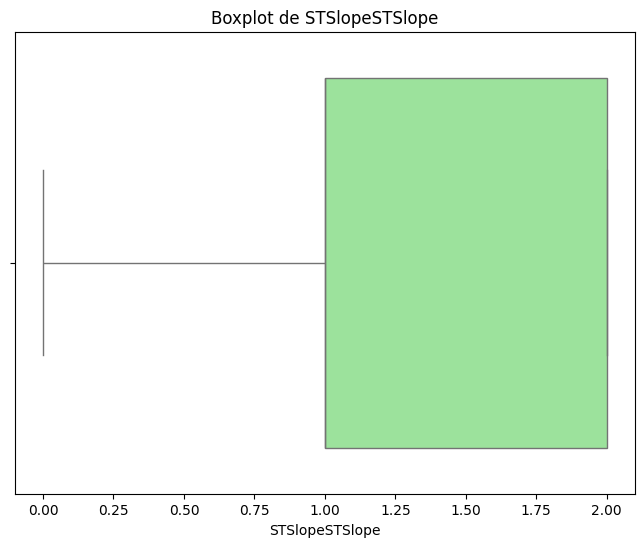

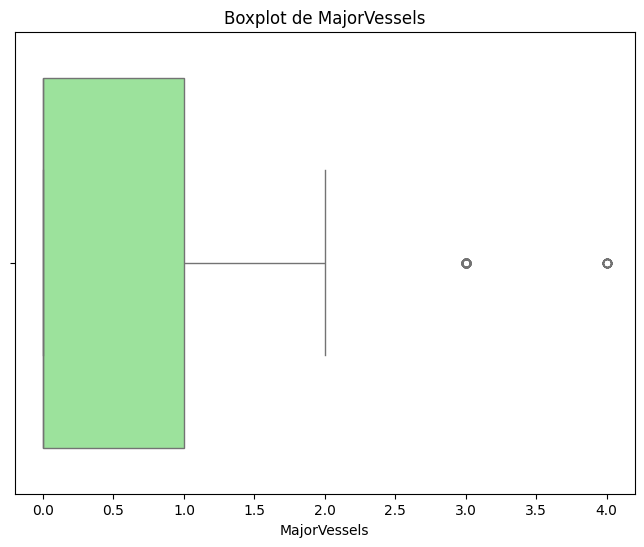

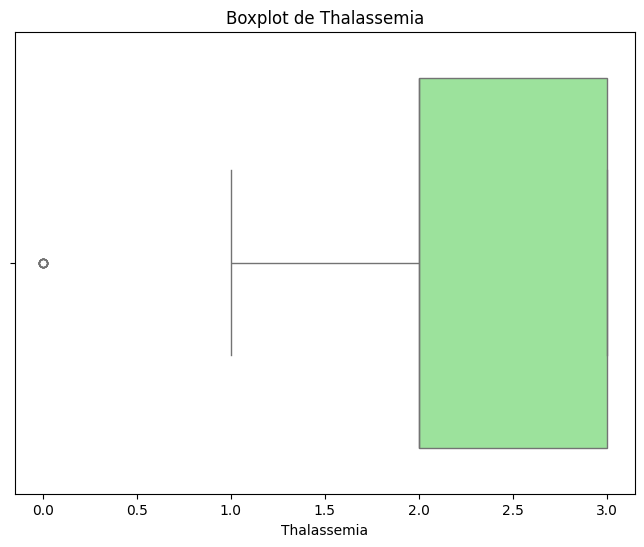

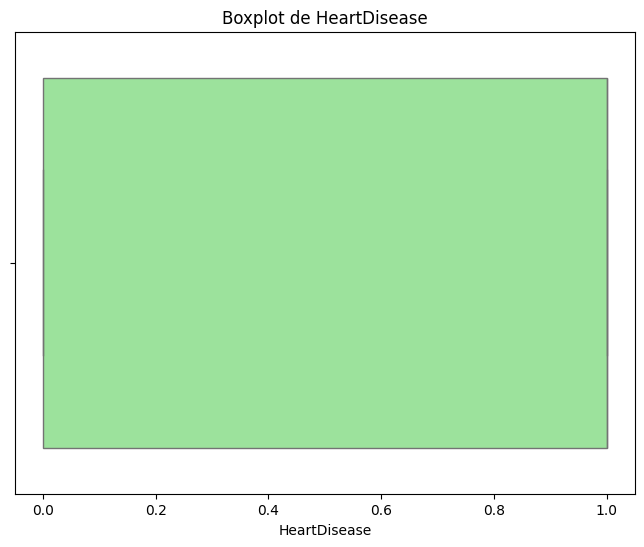

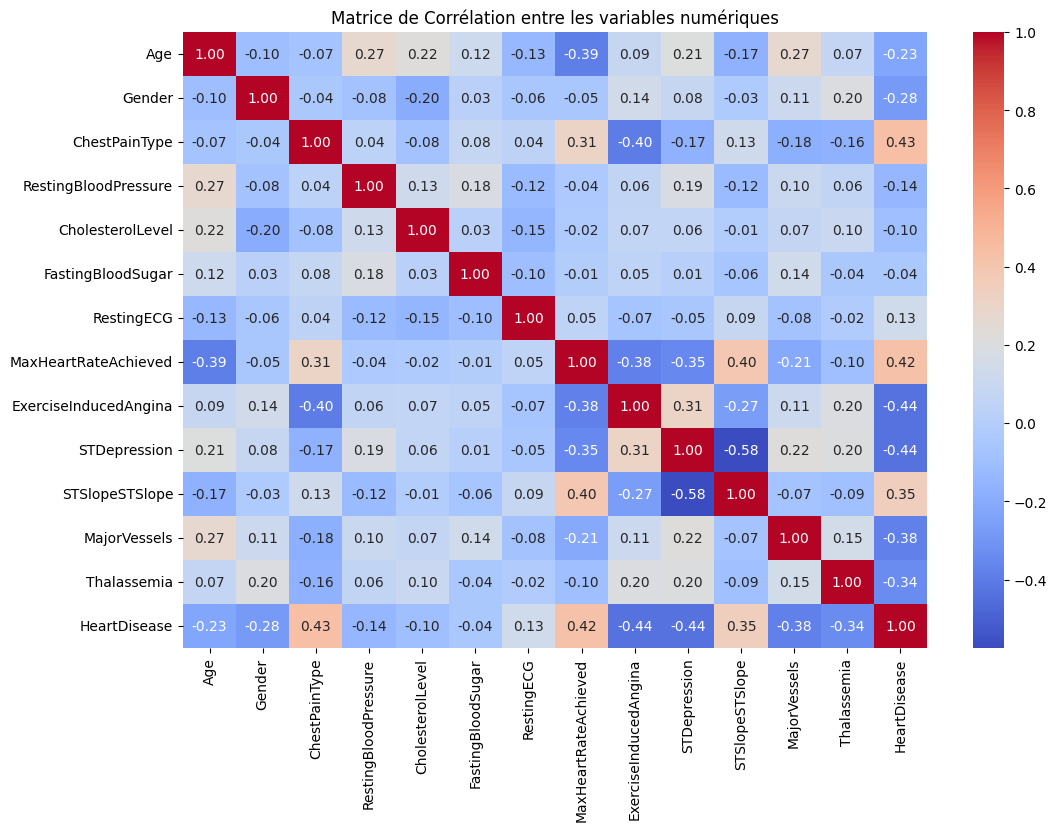

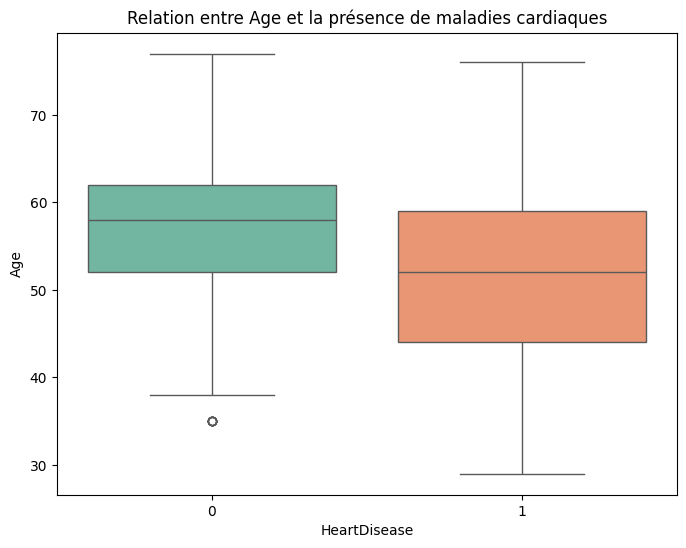

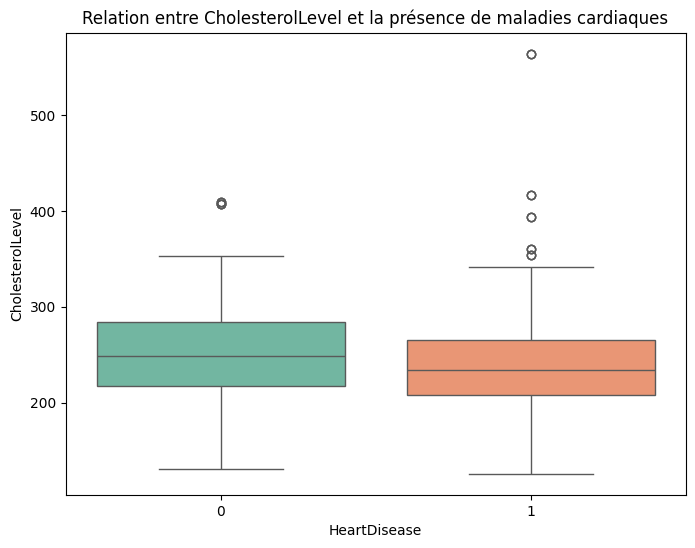

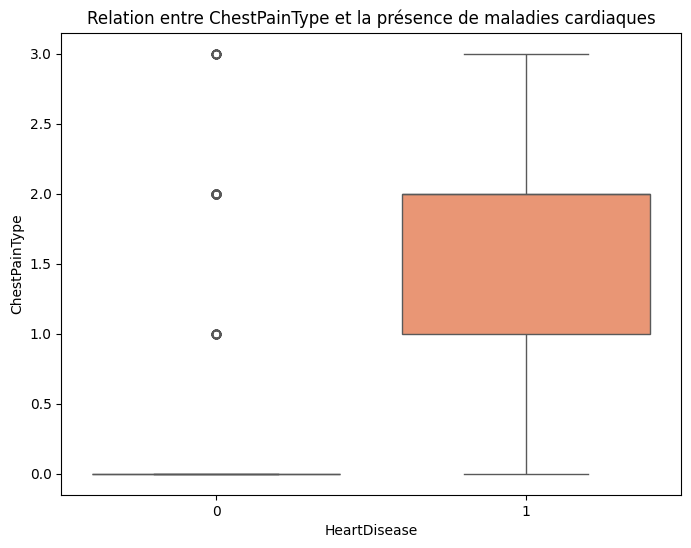

In [4]:
# 2. Visualisations préliminaires

# Histogrammes pour les colonnes numériques
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distributions des colonnes numériques')
plt.show()

# Boxplots pour les colonnes numériques
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.show()

# Heatmap de corrélation entre les variables numériques
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation entre les variables numériques')
plt.show()

# 3. Analyser les relations entre certaines variables
# Par exemple, analyser la relation entre Age et Heart Disease (target)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['HeartDisease'], y=df['Age'], palette='Set2')
plt.title('Relation entre Age et la présence de maladies cardiaques')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['HeartDisease'], y=df['CholesterolLevel'], palette='Set2')
plt.title('Relation entre CholesterolLevel et la présence de maladies cardiaques')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['HeartDisease'], y=df['ChestPainType'], palette='Set2')
plt.title('Relation entre ChestPainType et la présence de maladies cardiaques')
plt.show()

In [5]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Remplacer les valeurs manquantes par la médiane pour chaque colonne numérique
df.fillna(df.median(), inplace=True)


Age                      0
Gender                   0
ChestPainType            0
RestingBloodPressure     0
CholesterolLevel         0
FastingBloodSugar        0
RestingECG               0
MaxHeartRateAchieved     0
ExerciseInducedAngina    0
STDepression             0
STSlopeSTSlope           0
MajorVessels             0
Thalassemia              0
HeartDisease             0
dtype: int64


In [6]:
# Suppression des valeurs aberrantes pour toutes les colonnes numériques
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Calcul des quartiles et de l'IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définition des bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR #(Interquartile Range)
    upper_bound = Q3 + 1.5 * IQR #(Interquartile Range)

    # Filtrage des données pour supprimer les valeurs aberrantes
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Vérification après nettoyage des données
print("Dimensions après suppression des valeurs aberrantes:", df.shape)


Dimensions après suppression des valeurs aberrantes: (769, 14)


In [7]:
from sklearn.preprocessing import StandardScaler

# Séparer les colonnes numériques et catégorielles
numerical_cols = ['Age', 'RestingBloodPressure', 'CholesterolLevel', 'FastingBloodSugar',
                  'RestingECG', 'MaxHeartRateAchieved',
                  'ExerciseInducedAngina', 'STDepression', 'STSlopeSTSlope',
                  'MajorVessels', 'Thalassemia']  # Liste des colonnes numériques

categorical_cols = ['Gender', 'ChestPainType']  # Liste des colonnes catégorielles

# Sélectionner les données numériques
X_numerical = df[numerical_cols]

# Normaliser les données numériques
scaler = StandardScaler()
X_numerical_normalized = scaler.fit_transform(X_numerical)

# Convertir les données normalisées en DataFrame
df_numerical_normalized = pd.DataFrame(X_numerical_normalized, columns=numerical_cols)

# Concaténer avec les données catégorielles
df_final = pd.concat([df_numerical_normalized, df[categorical_cols], df['HeartDisease']], axis=1)

# Vérifier la structure du DataFrame final
print(df_final.head())


        Age  RestingBloodPressure  CholesterolLevel  FastingBloodSugar  \
0 -0.155300             -0.240805         -0.675971                0.0   
1  1.797168              1.066034         -1.530053                0.0   
2  0.820934              1.262060         -0.878254                0.0   
3  0.495523             -1.874354          0.133160                0.0   
4  0.170111              2.046163          1.054670                0.0   

   RestingECG  MaxHeartRateAchieved  ExerciseInducedAngina  STDepression  \
0    0.870574              0.768418              -0.691987      0.026266   
1    0.870574             -1.138183               1.445114      1.550693   
2    0.870574              0.458041              -0.691987     -0.926501   
3   -1.069923             -1.271202              -0.691987      0.026266   
4   -1.069923             -0.251392               1.445114     -0.164287   

   STSlopeSTSlope  MajorVessels  Thalassemia  Gender  ChestPainType  \
0        0.952814      2.13

In [8]:
# Imputation des valeurs manquantes
df_final['Gender'] = df_final['Gender'].fillna(df_final['Gender'].mode()[0])
df_final['ChestPainType'] = df_final['ChestPainType'].fillna(df_final['ChestPainType'].mode()[0])
df_final['HeartDisease'] = df_final['HeartDisease'].fillna(df_final['HeartDisease'].mode()[0])


# Vérifier la structure du DataFrame final
print(df_final.isnull().sum())  # Pour vérifier qu'il n'y a plus de NaN
print(df_final.head())  # Vérifier les premières lignes pour s'assurer que tout est correct


Age                      204
RestingBloodPressure     204
CholesterolLevel         204
FastingBloodSugar        204
RestingECG               204
MaxHeartRateAchieved     204
ExerciseInducedAngina    204
STDepression             204
STSlopeSTSlope           204
MajorVessels             204
Thalassemia              204
Gender                     0
ChestPainType              0
HeartDisease               0
dtype: int64
        Age  RestingBloodPressure  CholesterolLevel  FastingBloodSugar  \
0 -0.155300             -0.240805         -0.675971                0.0   
1  1.797168              1.066034         -1.530053                0.0   
2  0.820934              1.262060         -0.878254                0.0   
3  0.495523             -1.874354          0.133160                0.0   
4  0.170111              2.046163          1.054670                0.0   

   RestingECG  MaxHeartRateAchieved  ExerciseInducedAngina  STDepression  \
0    0.870574              0.768418              -0.691987  

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Séparer les caractéristiques (X) et la variable cible (y)
X = df_final.drop(columns=['HeartDisease'])
y = df_final['HeartDisease']

# Diviser les données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle Random Forest
model = RandomForestClassifier()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6307692307692307
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.33      0.39        70
         1.0       0.68      0.80      0.74       125

    accuracy                           0.63       195
   macro avg       0.58      0.56      0.56       195
weighted avg       0.61      0.63      0.61       195



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import sklearn

# Vérifier la version de Scikit-learn
print("Version de Scikit-learn :", sklearn.__version__)

# Définir le modèle RandomForest
rf = RandomForestClassifier(random_state=42)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],  # Profondeur des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons pour une feuille
    'max_features': ['sqrt', 'log2'],  # Nombre de caractéristiques à prendre en compte
    'bootstrap': [True, False]  # Bootstrap ou non
}

# Mettre en place GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Exécuter la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)

# Appliquer le modèle avec les meilleurs paramètres sur le test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Évaluation du modèle avec un rapport de classification
print(classification_report(y_test, y_pred))


Version de Scikit-learn : 1.6.0
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Meilleurs paramètres :  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.60      0.26      0.36        70
         1.0       0.68      0.90      0.78       125

    accuracy                           0.67       195
   macro avg       0.64      0.58      0.57       195
weighted avg       0.65      0.67      0.63       195



In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Diviser les données en caractéristiques et étiquettes
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer SMOTE pour rééquilibrer les classes dans l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Créer et entraîner le modèle RandomForest avec les données rééquilibrées
rf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='sqrt',
                            min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Évaluer le modèle sur l'ensemble de test
y_pred = rf.predict(X_test)

# Afficher les résultats
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.948051948051948
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.94      0.98      0.96        90

    accuracy                           0.95       154
   macro avg       0.95      0.94      0.95       154
weighted avg       0.95      0.95      0.95       154



In [12]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définir le pipeline
smote = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Paramètres pour la recherche en grille
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

# Créer le pipeline avec SMOTE et RandomForest
pipeline = Pipeline(steps=[('smote', smote), ('rf', rf)])

# Configurer la recherche en grille avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Effectuer la recherche en grille
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
# Évaluation du modèle avec un rapport de classification
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-validation score: 0.9869918699186991
Accuracy: 0.948051948051948
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.94      0.98      0.96        90

    accuracy                           0.95       154
   macro avg       0.95      0.94      0.95       154
weighted avg       0.95      0.95      0.95       154

